In [1]:
from ultralytics import YOLO

# Check if YOLO loads successfully
model = YOLO('yolov8n.pt')  # Load a basic YOLOv8 model
print("YOLOv8 loaded successfully!")


YOLOv8 loaded successfully!


In [ ]:
import cv2
import os
import pandas as pd
from ultralytics import YOLO
import numpy as np

# Initialize YOLO model for pose estimation
# Ensure this model supports keypoint detection (e.g., yolov8n-pose.pt)
model = YOLO("yolov8n-pose.pt")

# Define paths for 'Normal' and 'Suspicious' video folders
normal_videos_path = r'D:\Sanath\Capstone\ds\Dataset\Dataset\misc\Normal'
suspicious_videos_path = r'D:\Sanath\Capstone\ds\Dataset\Dataset\misc\Shoplifting'

# Output path for images and CSV data
output_csv = 'keypoints.csv'

# Prepare data storage
all_data = []

def process_videos(folder_path, label):
    video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.avi', '.mov'))]
    video_count = 0
    total_videos = len(video_files)

    print(f"Starting to process {total_videos} videos in the {label} category...")

    for video_file in video_files:
        print(f"Processing video: {video_file}")
        video_path = os.path.join(folder_path, video_file)
        cap = cv2.VideoCapture(video_path)
        frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        fps = cap.get(cv2.CAP_PROP_FPS)
        seconds = round(frames / fps)

        frame_total = 400  # Number of frames to sample per video
        i = 0

        while cap.isOpened():
            cap.set(cv2.CAP_PROP_POS_MSEC, (i * ((seconds / frame_total) * 1000)))
            ret, frame = cap.read()
            if not ret:
                break

            # Detect humans and pose keypoints in the frame
            results = model(frame, verbose=False)
            for r in results:
                bound_box = r.boxes.xyxy
                conf = r.boxes.conf.tolist()

                # Check if keypoints are detected
                if r.keypoints is not None:
                    keypoints = r.keypoints.xyn.tolist()
                    
                    for index, box in enumerate(bound_box):
                        if conf[index] > 0.75:  # Confidence threshold
                            data = {'image_name': f'{video_file}_frame_{i}.jpg', 'label': label}
                            for j in range(len(keypoints[index])):
                                data[f'x{j}'] = keypoints[index][j][0]
                                data[f'y{j}'] = keypoints[index][j][1]
                            all_data.append(data)

            print(f"Processed frame {i} of video {video_file}")
            i += 1
        
        cap.release()
        video_count += 1
        print(f"Finished processing video: {video_file}")

    print(f"Completed processing {video_count} videos in the {label} category.")

# Process 'Normal' and 'Suspicious' videos
process_videos(normal_videos_path, 'Normal')
process_videos(suspicious_videos_path, 'Suspicious')

# Save the collected keypoint data to CSV
df = pd.DataFrame(all_data)
df.to_csv(output_csv, index=False)
print("Data extraction complete and saved to CSV.")


Starting to process 90 videos in the Normal category...
Processing video: Normal (1).mp4
Processed frame 0 of video Normal (1).mp4
Processed frame 1 of video Normal (1).mp4
Processed frame 2 of video Normal (1).mp4
Processed frame 3 of video Normal (1).mp4
Processed frame 4 of video Normal (1).mp4
Processed frame 5 of video Normal (1).mp4
Processed frame 6 of video Normal (1).mp4
Processed frame 7 of video Normal (1).mp4
Processed frame 8 of video Normal (1).mp4
Processed frame 9 of video Normal (1).mp4
Processed frame 10 of video Normal (1).mp4
Processed frame 11 of video Normal (1).mp4
Processed frame 12 of video Normal (1).mp4
Processed frame 13 of video Normal (1).mp4
Processed frame 14 of video Normal (1).mp4
Processed frame 15 of video Normal (1).mp4
Processed frame 16 of video Normal (1).mp4
Processed frame 17 of video Normal (1).mp4
Processed frame 18 of video Normal (1).mp4
Processed frame 19 of video Normal (1).mp4
Processed frame 20 of video Normal (1).mp4
Processed frame 21

In [1]:
from ultralytics import YOLO

# Load the model (replace with your model path)
model = YOLO("yolov8n.pt")

# Run inference on a test image (replace with a sample image path)
results = model(r"D:\Sanath\Capstone\ds\Dataset\Dataset\test\shopliftingf\68_frame_0.jpg", verbose=False)

# Check if the model output contains keypoints
for r in results:
    if hasattr(r, 'keypoints') and r.keypoints is not None:
        print("Keypoints detected!")
        print(r.keypoints.xyn.tolist())  # Print keypoints data (optional)
    else:
        print("This model does not output keypoints.")


This model does not output keypoints.


In [5]:
pip install ultralytics--upgrade


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ultralytics--upgrade (from versions: none)
ERROR: No matching distribution found for ultralytics--upgrade


In [6]:
from ultralytics import YOLO

# Load a pre-trained pose estimation model
model = YOLO('yolov8n-pose.pt')  # Replace with the correct path or use a pre-trained pose model
results = model(r"D:\Sanath\Capstone\ds\Dataset\Dataset\test\shopliftingf\68_frame_0.jpg", verbose=False)

for r in results:
    if hasattr(r, 'keypoints') and r.keypoints is not None:
        print("Keypoints detected!")
        print(r.keypoints.xyn.tolist())
    else:
        print("Keypoints not available in the output.")



100%|██████████| 6.52M/6.52M [00:00<00:00, 6.87MB/s]


Keypoints detected!
[[[0.45952749252319336, 0.3823746144771576], [0.4654251039028168, 0.37079155445098877], [0.45317143201828003, 0.36627712845802307], [0.0, 0.0], [0.4199996590614319, 0.34828028082847595], [0.4372733533382416, 0.4170084595680237], [0.373288094997406, 0.4149780869483948], [0.4511757791042328, 0.5129848122596741], [0.3567006587982178, 0.5339102149009705], [0.49847611784935, 0.5147398710250854], [0.44276919960975647, 0.5430469512939453], [0.4313068985939026, 0.62971431016922], [0.38891294598579407, 0.6378015279769897], [0.4266901910305023, 0.789821207523346], [0.38094326853752136, 0.8166088461875916], [0.4170716404914856, 0.9361096024513245], [0.3835534453392029, 0.9768654108047485]]]


Epoch 1/50


D:\Games\anaconda3\envs\pose\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1697/1697 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6868 - loss: 0.5850 - val_accuracy: 0.8256 - val_loss: 0.4142
Epoch 2/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8106 - loss: 0.4266 - val_accuracy: 0.8578 - val_loss: 0.3429
Epoch 3/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8462 - loss: 0.3687 - val_accuracy: 0.8865 - val_loss: 0.2924
Epoch 4/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.3293 - val_accuracy: 0.8924 - val_loss: 0.2646
Epoch 5/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8785 - loss: 0.2991 - val_accuracy: 0.9079 - val_loss: 0.2376
Epoch 6/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8889 - loss: 0.2766 - val_accuracy: 0.9118 - val_loss: 0.2190
Epoch 7/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8934 - loss: 0.2618 - val_accuracy: 0.9127 - val_loss: 0.2055
Epoch 8/50
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8996 - loss: 0.2447 - val_accurac

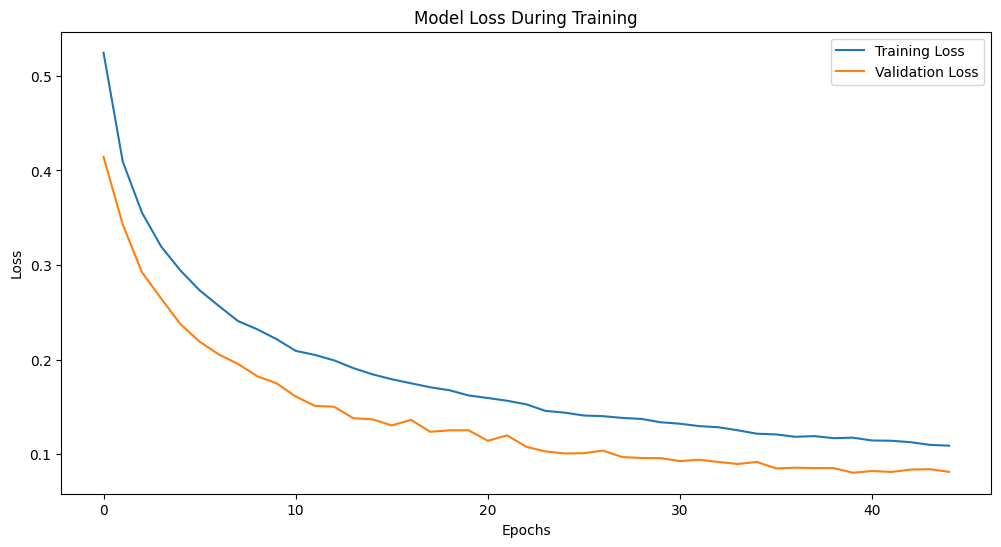

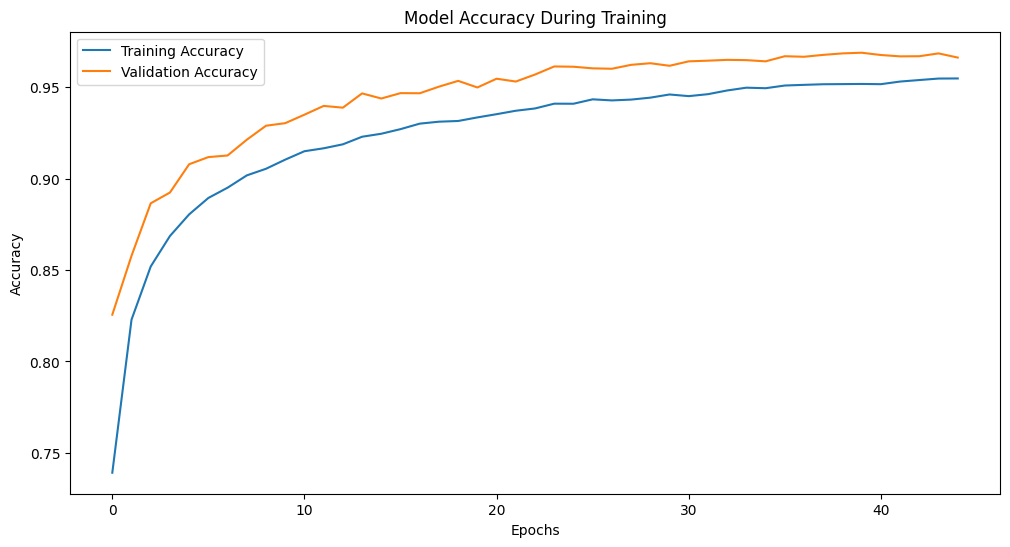

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV data
csv_file = 'keypoints.csv'
df = pd.read_csv(csv_file)

# Prepare feature columns (keypoints) and target column ('label')
X = df.drop(columns=['image_name', 'label'])
y = df['label'].apply(lambda x: 1 if x == 'Suspicious' else 0)  # Encode labels (0 for 'Normal', 1 for 'Suspicious')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input (samples, timesteps, features)
# Assuming we use each data point as an individual timestep with one feature set per time step
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [4]:
model.save('suspicious_activity_model.h5')


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV data
csv_file = 'keypoints.csv'
df = pd.read_csv(csv_file)

# Prepare feature columns (keypoints) and target column ('label')
X = df.drop(columns=['image_name', 'label'])
y = df['label'].apply(lambda x: 1 if x == 'Suspicious' else 0)  # Encode labels (0 for 'Normal', 1 for 'Suspicious')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")


D:\Games\anaconda3\envs\pose\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7276
           1       0.98      0.97      0.97      9690

    accuracy                           0.97     16966
   macro avg       0.97      0.97      0.97     16966
weighted avg       0.97      0.97      0.97     16966


Test Accuracy: 0.97


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
import cv2
import matplotlib.pyplot as plt

def extract_keypoints(frame):
    # Example placeholder for extracting keypoints logic, you can adapt this
    # to use pose estimation, feature extraction, etc.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    keypoints = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    
    if keypoints is not None:
        # Flatten the keypoints and create a feature array
        keypoints = keypoints.reshape(-1)
        # Ensure it matches the input shape of your model if needed
        return keypoints[:X_train.shape[1]]  # Trim or pad to match feature dimension
    
    return None

def process_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame (example: using a simple keypoint extraction logic)
        keypoints = extract_keypoints(frame)  # You need to define this function based on your model

        if keypoints is not None:
            keypoints = scaler.transform([keypoints])
            keypoints = keypoints.reshape((keypoints.shape[0], 1, keypoints.shape[1]))
            prediction = (model.predict(keypoints) > 0.5).astype(int)[0][0]
            
            # Draw a bounding box
            color = (0, 0, 255) if prediction == 1 else (0, 255, 0)  # Red for 'Suspicious', Green for 'Normal'
            cv2.rectangle(frame, (50, 50), (frame.shape[1] - 50, frame.shape[0] - 50), color, 2)
            label = 'Suspicious' if prediction == 1 else 'Normal'
            cv2.putText(frame, label, (60, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        out.write(frame)
        cv2.imshow('Frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example call to process a video
process_video('38.mp4', 'output_video.avi')


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'
